- trovare un experiment container di interesse
- estrarre esperimento di interesse
- estrarre cellule per l'esperimento scelto
- fluorescence trace per una determinata cellula
- tentativo (non funziona!) di vedere la fluorescenza insieme all'istante dello stimolo

## Experiment Container
Un Experiment Container contiene esperimenti con **uguale** :
- cre_line
- imaging_depth
- targeted_structure

Bisogna definire questi tre per scegliere l'esperimento di interesse

All'interno del container gli esperimenti hanno **diverso**:
- stimolo
- experiment_id, cell_id
- ...

In [1]:
from allensdk.core.brain_observatory_cache import BrainObservatoryCache
import pprint

boc = BrainObservatoryCache(manifest_file='boc/manifest.json')


# Download a list of all targeted areas
targeted_structures = boc.get_all_targeted_structures()
print("all targeted structures: " + str(targeted_structures)+ "\n")
# Download experiment containers for VISp experiments: (targeted_structures=['VISp'])

# Download a list of all imaging depths
depths = boc.get_all_imaging_depths()
print("all imaging depths: " + str(depths) + "\n")

# Download a list of all cre driver lines 
cre_lines = boc.get_all_cre_lines()
print("all cre lines:\n" + str(cre_lines) )

all targeted structures: [u'VISal', u'VISam', u'VISl', u'VISp', u'VISpm', u'VISrl']

all imaging depths: [175, 185, 195, 200, 205, 225, 250, 265, 275, 276, 285, 300, 320, 325, 335, 350, 365, 375, 390, 400, 550, 570, 625]

all cre lines:
[u'Cux2-CreERT2', u'Emx1-IRES-Cre', u'Fezf2-CreER', u'Nr5a1-Cre', u'Ntsr1-Cre_GN220', u'Pvalb-IRES-Cre', u'Rbp4-Cre_KL100', u'Rorb-IRES2-Cre', u'Scnn1a-Tg3-Cre', u'Slc17a7-IRES2-Cre', u'Sst-IRES-Cre', u'Tlx3-Cre_PL56', u'Vip-IRES-Cre']


In [2]:
experiment_containers = boc.get_experiment_containers(targeted_structures=['VISp'],
                                                     imaging_depths=[350]
                                                     )
print("Numero di Experiment Containers con queste tre caratteristiche: %d" % len(experiment_containers))
experiment_containers[7]

Numero di Experiment Containers con queste tre caratteristiche: 15


{'cre_line': u'Scnn1a-Tg3-Cre',
 'donor_name': u'231953',
 'failed': False,
 'id': 511498742,
 'imaging_depth': 350,
 'reporter_line': u'Ai93(TITL-GCaMP6f)',
 'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953',
 'tags': [],
 'targeted_structure': u'VISp'}

## Find Experiment
Scelgo un Experiment Container a caso tra questi. Scelgo il primo: contiene 3 esperimenti

In [3]:
experiment_container_id = experiment_containers[7]['id']
experiments = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id])

experiments

[{'acquisition_age_days': 90,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'231953',
  'experiment_container_id': 511498742,
  'fail_eye_tracking': True,
  'id': 511242327,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_C',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 92,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'231953',
  'experiment_container_id': 511498742,
  'fail_eye_tracking': True,
  'id': 511534603,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_A',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953',
  'targeted_structure': u'VISp'},
 {'acquisition_age_days': 91,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'231953',
  'experiment_container_id': 511498742,
  'fail_eye_tracking': False,
  'id': 511434920,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
 

Scelgo l'esperimento con stimolo: **static gratings**

In [4]:
import allensdk.brain_observatory.stimulus_info as stim_info

# Find the experiment with the static static gratings stimulus
exp = boc.get_ophys_experiments(experiment_container_ids=[experiment_container_id], 
                                stimuli=[stim_info.STATIC_GRATINGS])
print("Experiment with static gratings:")
pprint.pprint(exp)


Experiment with static gratings:
[{'acquisition_age_days': 91,
  'cre_line': u'Scnn1a-Tg3-Cre',
  'donor_name': u'231953',
  'experiment_container_id': 511498742,
  'fail_eye_tracking': False,
  'id': 511434920,
  'imaging_depth': 350,
  'reporter_line': u'Ai93(TITL-GCaMP6f)',
  'session_type': u'three_session_B',
  'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953',
  'targeted_structure': u'VISp'}]


## Download experiment
Download the NWB file for this experiment.

In [5]:
experiment = boc.get_ophys_experiment_data(exp[0]['id']) 

# print out the metadata available in the NWB file
pprint.pprint(experiment.get_metadata())

print("\n stimuli available in this file:")
print(experiment.list_stimuli())

{'age_days': 92,
 'cre_line': u'Scnn1a-Tg3-Cre/wt',
 'device': u'Nikon A1R-MP multiphoton microscope',
 'device_name': u'CAM2P.2',
 'excitation_lambda': u'910 nanometers',
 'experiment_container_id': 511498742,
 'fov': u'400x400 microns (512 x 512 pixels)',
 'genotype': u'Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaMP6f)/Ai93(TITL-GCaMP6f)',
 'imaging_depth_um': 350,
 'indicator': u'GCaMP6f',
 'ophys_experiment_id': 511434920,
 'pipeline_version': u'3.0',
 'session_start_time': datetime.datetime(2016, 3, 31, 9, 1, 51),
 'session_type': u'three_session_B',
 'sex': u'female',
 'specimen_name': u'Scnn1a-Tg3-Cre;Camk2a-tTA;Ai93-231953',
 'targeted_structure': u'VISp'}

 stimuli available in this file:
[u'natural_movie_one', u'natural_scenes', u'spontaneous', u'static_gratings']


/home/laura/anaconda2/lib/python2.7/site-packages/allensdk/core/brain_observatory_nwb_data_set.py:742: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  v = f[disk_key].value


In [6]:
experiment_id = experiment.get_metadata()['ophys_experiment_id']

In [7]:
# ID delle cellule per questo esperimento
experiment_cells_id = experiment.get_cell_specimen_ids()
len(experiment_cells_id)

/home/laura/anaconda2/lib/python2.7/site-packages/allensdk/core/brain_observatory_nwb_data_set.py:476: H5pyDeprecationWarning: dataset.value has been deprecated. Use dataset[()] instead.
  'ImageSegmentation']['cell_specimen_ids'].value


171

In [8]:
experiment_cells_id

array([517398896, 589153647, 517398865, 517398291, 589153268, 517397605,
       517397554, 517398817, 517398809, 517398821, 517398750, 517398813,
       517398740, 517398745, 517397875, 517398886, 517398056, 517397564,
       517397559, 517397823, 517398845, 517398422, 589153309, 517398755,
       517397585, 517398772, 517398603, 589153140, 517398389, 517398805,
       517398446, 517398784, 517398966, 517398450, 517398569, 517398989,
       517398793, 517397407, 589153503, 589153550, 517397402, 517398379,
       517398797, 517398627, 517398977, 517398701, 517398363, 517398454,
       517398552, 517398880, 517397393, 589153653, 517397590, 517398690,
       517398685, 517398631, 517398366, 517398467, 517397615, 517397641,
       589153577, 517397610, 589153570, 517398596, 517398608, 517397575,
       589152999, 517397377, 517398178, 517398175, 517397389, 517397385,
       517397381, 517397624, 517397833, 517398497, 517397673, 517398482,
       517397703, 517397732, 517398566, 517398563, 

In [29]:
import pandas as pd

# Download cells and convert to DataFrame
cells = boc.get_cell_specimens()
cells = pd.DataFrame.from_records(cells)
print("total cells: %d" % len(cells))

total cells: 63251


In [19]:
experiment_cells = cells[cells['cell_specimen_id'].isin(experiment_cells_id)]
experiment_cells.shape

(171, 60)

In [20]:
experiment_cells.head()

,all_stim,area,cell_specimen_id,donor_full_genotype,dsi_dg,experiment_container_id,failed_experiment_container,g_dsi_dg,g_osi_dg,g_osi_sg,...,specimen_id,tfdi_dg,time_to_peak_ns,time_to_peak_sg,tld1_id,tld1_name,tld2_id,tld2_name,tlr1_id,tlr1_name
6,False,VISp,517397361,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,NaN,NaN,0.833125,...,502185555,NaN,0.33250,0.3325,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
7,False,VISp,517397365,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.687334,0.097596,0.409507,...,502185555,0.281851,0.29925,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
8,False,VISp,517397369,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,NaN,511498742,False,0.608939,0.774422,0.574609,...,502185555,0.251097,0.26600,0.0665,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
9,False,VISp,517397373,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,1.953573,511498742,False,0.446050,0.098961,0.564285,...,502185555,0.378536,0.26600,NaN,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)
10,False,VISp,517397377,Scnn1a-Tg3-Cre/wt;Camk2a-tTA/wt;Ai93(TITL-GCaM...,0.506407,511498742,False,0.407438,0.655897,0.924475,...,502185555,0.379998,0.46550,0.3325,177837516,Scnn1a-Tg3-Cre,177837320.0,Camk2a-tTA,265943423,Ai93(TITL-GCaMP6f)


## Fluorescence for a cell of the experiment

In [46]:
cell_id = experiment_cells_id[33]
cell_id

517398450

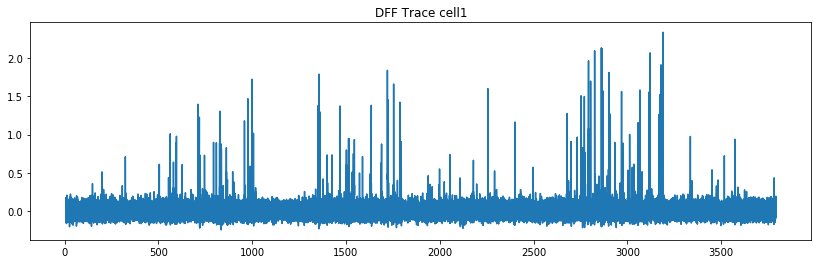

In [45]:
cell_id = experiment_cells_id[33]
time, trace = experiment.get_dff_traces(cell_specimen_ids=[cell_id])
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(14,4))
plt.title("DFF Trace cell1")
plt.plot(time, trace[0])
plt.show()

In [35]:
trace[0]
len(trace[0])

113864

In [47]:
df = pd.DataFrame(trace[0])
df.to_csv('cellula_517398450_dep350.csv',index=False)

In [36]:
from allensdk.brain_observatory.static_gratings import StaticGratings
data_set = boc.get_ophys_experiment_data(experiment_id)
static_gratings = StaticGratings(data_set)
static_gratings

### Stimulus time and fluorescence trace

In [37]:
from allensdk.brain_observatory.static_gratings import StaticGratings
data_set = boc.get_ophys_experiment_data(experiment_id)
static_gratings = StaticGratings(data_set)
static_gratings.timestamps

array([  51.2336 ,   51.26684,   51.30008, ..., 3836.50476, 3836.538  ,
       3836.57125])

In [32]:
# Seleziono le caratteristiche dello stimolo (ci sono diversi static grating - a seconda dell'orientamento, 
# distanza ecc)

cell_loc = experiment.get_cell_specimen_indices([cell_id])[0]
#static_gratings.peak.loc[cell_loc]
pref_ori = static_gratings.orivals[static_gratings.peak.ori_sg[cell_loc]]
pref_sf = static_gratings.sfvals[static_gratings.peak.sf_sg[cell_loc]]
pref_phase = static_gratings.phasevals[static_gratings.peak.phase_sg[cell_loc]]
print("Preferred direction:", pref_ori)
print("Preferred temporal frequency:", pref_sf)
print("Preferred phase:", pref_phase)

KeyboardInterrupt: 

In [18]:
subset = static_gratings.sweep_response[(static_gratings.stim_table.orientation==pref_ori)&
                                        (static_gratings.stim_table.spatial_frequency==pref_sf)&
                                        (static_gratings.stim_table.phase==pref_phase)]
pref_trials = static_gratings.stim_table[(static_gratings.stim_table.orientation==pref_ori)&
                                        (static_gratings.stim_table.spatial_frequency==pref_sf)&
                                        (static_gratings.stim_table.phase==pref_phase)]
print(subset.shape)
pref_trials

(48, 175)


,orientation,spatial_frequency,phase,start,end
84,150.0,0.04,0.0,1379,1386
146,150.0,0.04,0.0,1845,1852
446,150.0,0.04,0.0,4104,4111
585,150.0,0.04,0.0,5150,5157
796,150.0,0.04,0.0,6738,6745
925,150.0,0.04,0.0,7709,7716
1139,150.0,0.04,0.0,9319,9326
1260,150.0,0.04,0.0,10230,10237
1500,150.0,0.04,0.0,12036,12043
1646,150.0,0.04,0.0,13135,13142


In [19]:
subset = subset.iloc[1:10]

[-0.931   -0.89775 -0.8645  -0.83125 -0.798   -0.76475 -0.7315  -0.69825
 -0.665   -0.63175 -0.5985  -0.56525 -0.532   -0.49875 -0.4655  -0.43225
 -0.399   -0.36575 -0.3325  -0.29925 -0.266   -0.23275 -0.1995  -0.16625
 -0.133   -0.09975 -0.0665  -0.03325  0.       0.03325  0.0665   0.09975
  0.133    0.16625  0.1995   0.23275  0.266    0.29925  0.3325   0.36575
  0.399    0.43225  0.4655   0.49875  0.532    0.56525  0.5985   0.63175
  0.665    0.69825  0.7315   0.76475  0.798    0.83125  0.8645   0.89775
  0.931    0.96425  0.9975   1.03075  1.064    1.09725  1.1305 ]


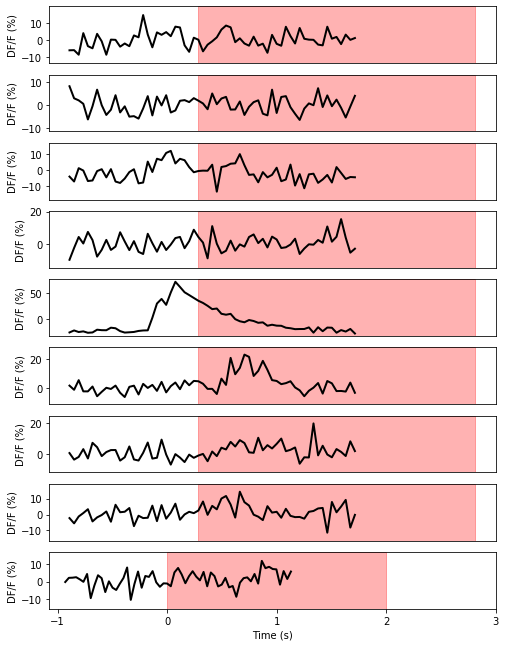

In [20]:
import numpy as np

trial_timestamps = np.arange(-1*static_gratings.interlength, static_gratings.interlength+static_gratings.sweeplength, 1.)/static_gratings.acquisition_rate
print(trial_timestamps)

plt.figure(figsize=(8,60))

for i in range(len(subset)):
    plt.subplot(len(pref_trials),1,i+1)
    plt.plot(trial_timestamps, subset[str(cell_loc)].iloc[i], color='k', lw=2)
    plt.axvspan(0,2,color='red', alpha=0.3)
    plt.ylabel("DF/F (%)")
    plt.ylim(min(subset[str(cell_loc)].iloc[i])-5, max(subset[str(cell_loc)].iloc[i])+5 ) 
    #plt.yticks(range(0,700,200))
    #plt.text(2.5, 300, str(round(subset_mean['dx'].iloc[i],2))+" cm/s")
    if i<(len(subset)-1):
        plt.xticks([])
    else:
        plt.xticks([-1,0,1,2,3])
        plt.xlabel("Time (s)")